<a href="https://colab.research.google.com/github/EloizioHMD/Python_DS/blob/main/Analise_preparacao_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculadora de Preço de Imóveis à venda no Recife com Python

Notebook por [Eloízio Dantas](https://github.com/EloizioHMD). Projeto final da Formação de Data Science da [Awari](https://awari.com.br/).

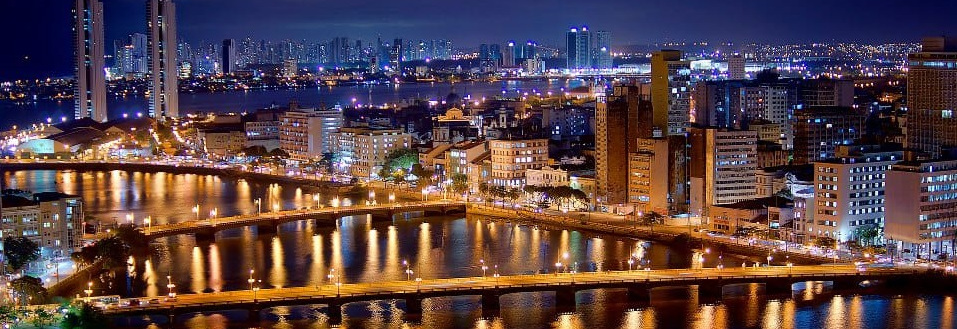

Awari é um plataforma de desenvolvimento de carreira para profissionais por educação de qualidade e individualizada no setor de tecnologia para impactar positivamente o mercado. Nessa formação, além das aulas, mentorias é necessário um projeto final que englobe um problema generalista.

O projeto final será uma calculadora de valor de imóveis à venda na cidade do Recife, para isso usaremos Python e suas bibliotecas, sobretudo as de Machine Learning. Cumpre destacar o Python como linguagem escolhida em detrimento das outras, pois é a linguagem mais utilizada no mercado nacional. No entanto, para mais informações acompanhe a  [documentação](http://) no medium.

## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento de dados

In [ ]:
## Carregar Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/recimovel_db.csv')

In [ ]:
df.head()

,endereco,bairro,area_m2,quartos,banheiros,vagas,valor,condominio
0,Rua General Polidoro,Várzea,55,2,2,1,330000,350
1,Rua Setúbal,Boa Viagem,86,3,3,2,780000,740
2,Rua Quarenta e Oito,Aflitos,69,3,3,1,378000,690
3,Rua Esmeraldino Bandeira,Graças,54,1,1,1,240000,590
4,Rua Edson Álvares,Casa Forte,94,2,3,2,535000,850


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39233 entries, 0 to 39232
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endereco    39233 non-null  object
 1   bairro      39233 non-null  object
 2   area_m2     39233 non-null  int64 
 3   quartos     39233 non-null  int64 
 4   banheiros   39233 non-null  int64 
 5   vagas       39233 non-null  int64 
 6   valor       39233 non-null  int64 
 7   condominio  39233 non-null  object
dtypes: int64(5), object(3)
memory usage: 2.4+ MB


## Análise Exploratória

In [ ]:
vendas_mil = (df['valor']/1000)

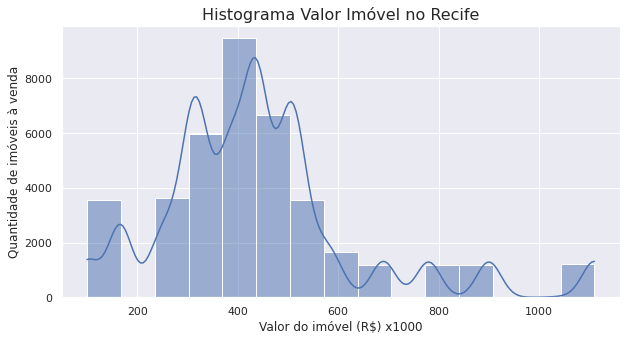

In [ ]:
sns.set()
plt.figure(figsize=(10, 5))
ax = sns.histplot(x=vendas_mil, kde=True, bins=15)
ax.set_title('Histograma Valor Imóvel no Recife', size=16)
ax.set(xlabel='Valor do imóvel (R$) x1000', ylabel='Quantidade de imóveis à venda')
plt.show()

A maioria dos imóveis estão entre trezentos mil reais a quinhentos mil reais.


In [ ]:
df['valor_m2'] = df.valor/df.area_m2
df['valor_m2'].head()

0    6000.000000
1    9069.767442
2    5478.260870
3    4444.444444
4    5691.489362
Name: valor_m2, dtype: float64

In [ ]:
preco_metro_quadrado_bairro = df.groupby('bairro')['valor_m2'].mean().head(20).reset_index()

metro_quadrado_por_bairro = preco_metro_quadrado_bairro.sort_values(by='valor_m2', ascending=False)

metro_quadrado_por_bairro

,bairro,valor_m2
14,Rosarinho,8538.461538
6,Encruzilhada,7258.064516
15,Torre,6574.263319
4,Casa Amarela,6341.853321
1,Boa Viagem,5861.939362
16,Várzea,5859.079583
3,Bongi,5696.202532
5,Casa Forte,5494.680851
12,Parnamirim,5402.829792
8,Imbiribeira,5161.290323


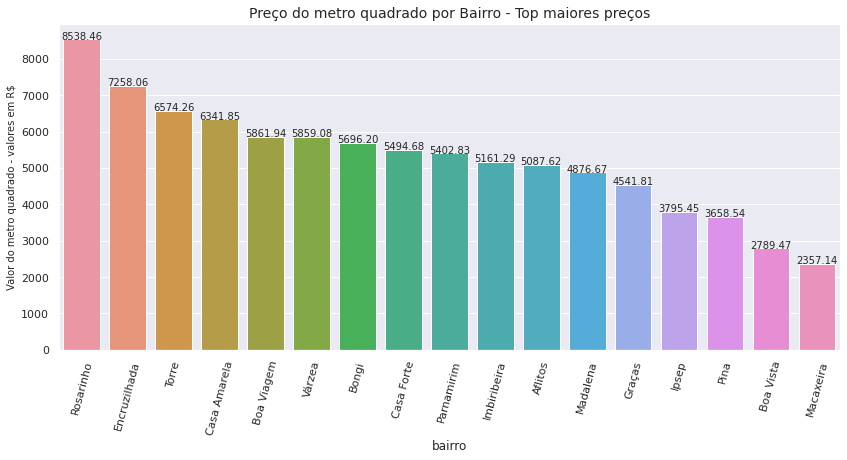

In [ ]:
# Plotando um gráfico de barras com os maiores valores por m² por bairro:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=metro_quadrado_por_bairro, x='bairro', y='valor_m2')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.title('Preço do metro quadrado por Bairro - Top maiores preços', fontsize=14)
plt.ylabel('Valor do metro quadrado - valores em R$', fontsize=10)

# Para adicionar o rótulo em cima das colunas exibindo valor:

for rotulo in ax.patches:
  height = rotulo.get_height()
  ax.text(rotulo.get_x()+rotulo.get_width()/2.,height + 3,'{:1.2f}'.format((height)),ha='center', fontsize=10)


print()

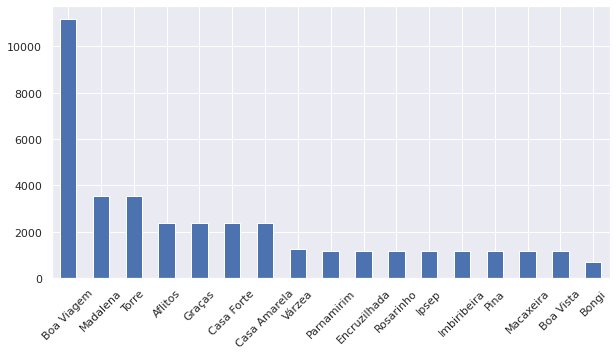

In [ ]:
plt.figure(figsize=(10, 5))
ax = df['bairro'].value_counts().plot.bar()
ax.tick_params(axis='x', rotation=45)

In [ ]:
df['bairro'].value_counts()

Boa Viagem      11171
Madalena         3555
Torre            3547
Aflitos          2378
Graças           2378
Casa Forte       2378
Casa Amarela     2365
Várzea           1262
Parnamirim       1190
Encruzilhada     1189
Rosarinho        1189
Ipsep            1189
Imbiribeira      1189
Pina             1189
Macaxeira        1189
Boa Vista        1188
Bongi             687
Name: bairro, dtype: int64

In [ ]:
df.sort_values(by='valor', ascending=False)

,endereco,bairro,area_m2,quartos,banheiros,vagas,valor,condominio,valor_m2
8008,Rua Caio Pereira,Rosarinho,130,4,4,2,1110000,1400,8538.461538
12892,Rua Caio Pereira,Rosarinho,130,4,4,2,1110000,1400,8538.461538
14806,Rua Caio Pereira,Rosarinho,130,4,4,2,1110000,1400,8538.461538
20944,Rua Caio Pereira,Rosarinho,130,4,4,2,1110000,1400,8538.461538
32098,Rua Caio Pereira,Rosarinho,130,4,4,2,1110000,1400,8538.461538
...,...,...,...,...,...,...,...,...,...
5359,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571
8494,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571
1003,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571
25489,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571


In [ ]:
df.sort_values(by='area_m2', ascending=False)

,endereco,bairro,area_m2,quartos,banheiros,vagas,valor,condominio,valor_m2
30801,Rua Francisco da Cunha,Boa Viagem,176,4,3,2,900000,1280,5113.636364
11496,Rua Francisco da Cunha,Boa Viagem,176,4,3,2,900000,1280,5113.636364
16215,Rua Francisco da Cunha,Boa Viagem,176,4,3,2,900000,1280,5113.636364
6348,Rua Francisco da Cunha,Boa Viagem,176,4,3,2,900000,1280,5113.636364
22023,Rua Francisco da Cunha,Boa Viagem,176,4,3,2,900000,1280,5113.636364
...,...,...,...,...,...,...,...,...,...
33046,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571
14830,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571
6976,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571
24070,Rua Tenente João Cícero,Boa Viagem,28,1,1,1,100000,n,3571.428571


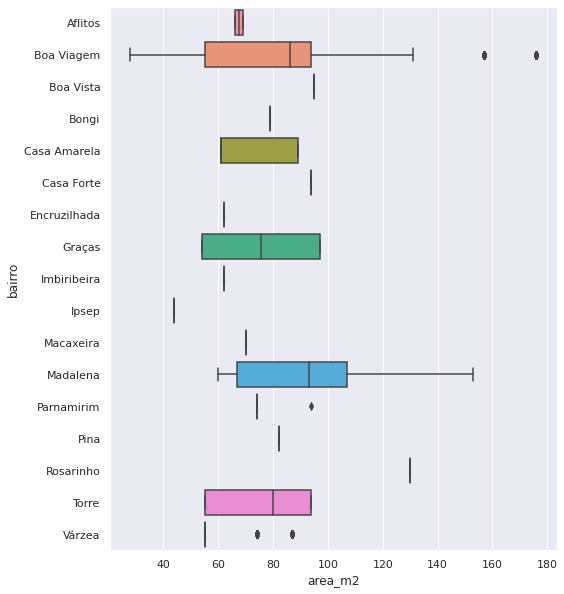

In [ ]:
plt.figure(figsize=(8, 10))
sns.boxplot(data = df.query('area_m2 < 10000').sort_values('bairro'), x = 'area_m2', y='bairro')

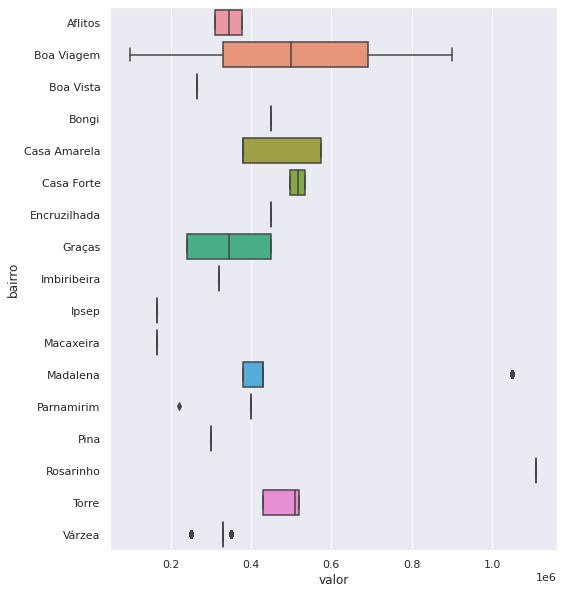

In [ ]:
plt.figure(figsize=(8, 10))
sns.boxplot(data = df.sort_values('bairro'), x = 'valor', y='bairro')

## Conclusão da Análise

Essa exploração dos dados demonstrou que a maioria dos imóveis possuem tamanhos entre 28 a 176 metros quadrados, um padrão que indica um padrão de classe média.Assim, é uma base que não possui os grandes imóveis de luxo da cidade que possuem valores superiores o que mexeria com o valor do metro quadrado dos imóveis.

Apesar do número de entradas, alguns bairros conceram apenas um valor, como Rosarinho, Pina, Macaxeira, entre outros.

Diante disso, essa base de dados estará, apesar das de quase 40 mil entradas, com um víes de identificação, podendo errar nas previsões para imóveis de maior padrão de qualidade.

In [ ]:
df['bairro'].value_counts()

Boa Viagem      11171
Madalena         3555
Torre            3547
Aflitos          2378
Graças           2378
Casa Forte       2378
Casa Amarela     2365
Várzea           1262
Parnamirim       1190
Encruzilhada     1189
Rosarinho        1189
Ipsep            1189
Imbiribeira      1189
Pina             1189
Macaxeira        1189
Boa Vista        1188
Bongi             687
Name: bairro, dtype: int64

In [ ]:
# Criando Feature para bairro cod
def bairro_to_cod(x):
  if x=='Boa Viagem': return 1
  if x=='Madalena': return 2
  if x=='Torre': return 3
  if x=='Aflitos': return 4
  if x=='Graças': return 5
  if x=='Casa Forte': return 6
  if x=='Casa Amarela': return 7
  if x=='Várzea': return 8
  if x=='Parnamirim': return 9
  if x=='Encruzilhada': return 10
  if x=='Rosarinho': return 11
  if x=='Ipsep': return 12
  if x=='Imbiribeira': return 13
  if x=='Pina': return 14
  if x=='Macaxeira': return 15 
  if x=='Boa Vista': return 16
  if x=='Bongi': return 17

df['bairrocod'] = df['bairro'].apply(bairro_to_cod)
df.head()

,endereco,bairro,area_m2,quartos,banheiros,vagas,valor,condominio,valor_m2,bairrocod
0,Rua General Polidoro,Várzea,55,2,2,1,330000,350,6000.000000,8
1,Rua Setúbal,Boa Viagem,86,3,3,2,780000,740,9069.767442,1
2,Rua Quarenta e Oito,Aflitos,69,3,3,1,378000,690,5478.260870,4
3,Rua Esmeraldino Bandeira,Graças,54,1,1,1,240000,590,4444.444444,5
4,Rua Edson Álvares,Casa Forte,94,2,3,2,535000,850,5691.489362,6


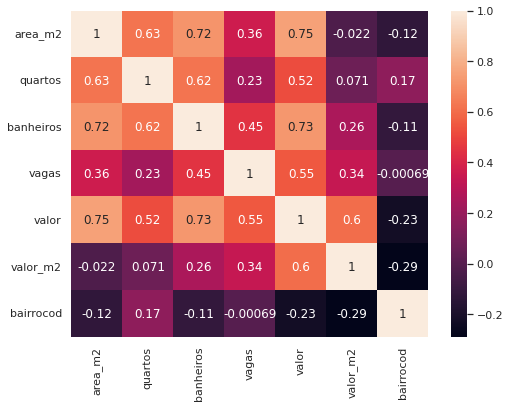

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

Alocar os bairros em um código representou pouca relevância de correlação entre as features.

In [ ]:
df.to_csv('recimovel_newf.csv', encoding = 'utf-8')